<a id='content'></a>
# Содержание
- [Загрузка библиотек](#include_libs)
- [Открытие CSV файла с базой данных](#df_open)
- [Задание 1.1](#task_1_1)
- [Задание 1.2](#task_1_2)
- [Задание 1.3](#task_1_3)
- [Черновик](#drft)


[Вернуться в начало](#content)
<a id='include_libs'></a>

In [1]:
!pip install plotly > None
!pip install pandas > None
!pip install typer > None
!pip install Path > None
!pip install numpy > None
!pip install matplotlib >None
!pip install seaborn > None
!pip install scikit-learn >None

In [2]:
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import pandas as pd
import typer
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn import datasets 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, f1_score, fbeta_score, confusion_matrix, precision_score, recall_score, accuracy_score, mean_squared_error,confusion_matrix, r2_score, median_absolute_error 
from sklearn.dummy import DummyRegressor, DummyClassifier


[Вернуться в начало](#content)
<a id='df_open'></a>

In [3]:
path = Path.cwd()
files = []
for ext in ['*.csv']:
    files += [p for p in Path(path).glob(ext) if p.is_file()]
    
data = pd.read_csv(files[0], delimiter=',')
df = pd.DataFrame(data)

df = df.drop(columns='A_id')

num_cols = df.select_dtypes(exclude='object')

df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


<a id='task_1_1'></a>
[Вернуться в начало](#content)
# Задание 1.1
**Выбрать и обосновать метрику для измерения качества**

Комментарий: В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения). 

Критерии оценки:

- Предложена метрика - 5 баллов <font color='red'>(status)</font>.
- Присутствует корректное обоснование - 5 баллов <font color='red'>(status)</font>.
 
###### Ответ:

База данных содерчит данные о яблоках, их характеристиках и соответствующее им качество. Предполагается рассмотрение задачи классификации, чтобы по параметрам яблока определить его качество.



In [4]:
# feature_cols = ['Size', 'Weight']
X = df.drop('Quality', axis=1) # dataset
y = df['Quality'].replace(to_replace=['good', 'bad'], value=[1, 0]) # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
dummy_clf = DummyClassifier(strategy="most_frequent") 
dummy_clf.fit(X_train, y_train);

In [6]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);

# Метрика: Accuracy

In [7]:
y_pred_dummy = dummy_clf.predict(X_test) 
accuracy_score(y_test, y_pred_dummy)

0.494

In [8]:
y_pred_log_reg = log_reg.predict(X_test) 
accuracy_score(y_test, y_pred_log_reg)

0.727

# Метрика: Precision & Recall

In [9]:
confusion_matrix(y_test, y_pred_dummy)

array([[  0, 506],
       [  0, 494]], dtype=int64)

In [10]:
confusion_matrix(y_test, y_pred_log_reg)

array([[360, 146],
       [127, 367]], dtype=int64)

In [11]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_log_reg, zero_division=0)}')
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_log_reg)}')

Precision for Dummy Classificator: 0.494
Precision for Logistic regression: 0.7153996101364523
Recall for Dummy Classificator: 1.0
Recall for Logistic regression: 0.742914979757085


# Метрика: F-мера

In [12]:
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')
print(f'F1-score for Dummy Classificator (recall bias): {fbeta_score(y_test, y_pred_dummy, beta=2)}')
print(f'F1-score for Logistic regression (recall bias): {fbeta_score(y_test, y_pred_log_reg, beta=2)}')
print(f'Fbeta-score for Dummy Classificator (precision bias): {fbeta_score(y_test, y_pred_dummy, beta=0.5)}')
print(f'Fbeta-score for Logistic regression (precision bias): {fbeta_score(y_test, y_pred_log_reg, beta=0.5)}')

F1-score for Dummy Classificator: 0.6613119143239625
F1-score for Logistic regression: 0.7288977159880833
F1-score for Dummy Classificator (recall bias): 0.8299731182795698
F1-score for Logistic regression (recall bias): 0.737243873041382
Fbeta-score for Dummy Classificator (precision bias): 0.5496217178460169
Fbeta-score for Logistic regression (precision bias): 0.720738413197172


In [13]:
y_pred = log_reg.predict_proba(X_test)[:, 1]

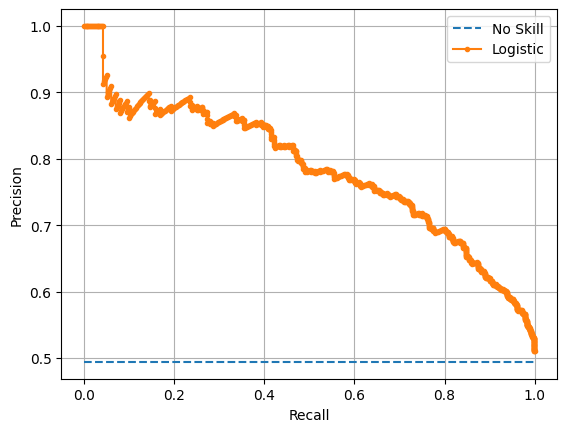

In [14]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

no_skill = len(y_test[y_test == 1]) / len(y_test)

plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

# Метрика: AUC ROC

In [15]:
def plot_roc_auc(fpr, tpr, thresholds, title):
  plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
  plt.plot(fpr, tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid()
  plt.show()

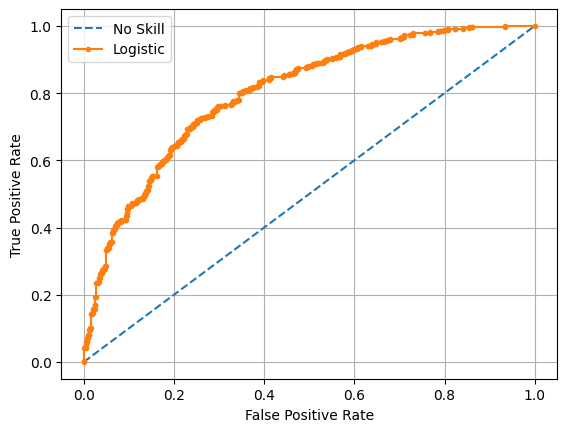

In [16]:
y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Logistic regression')

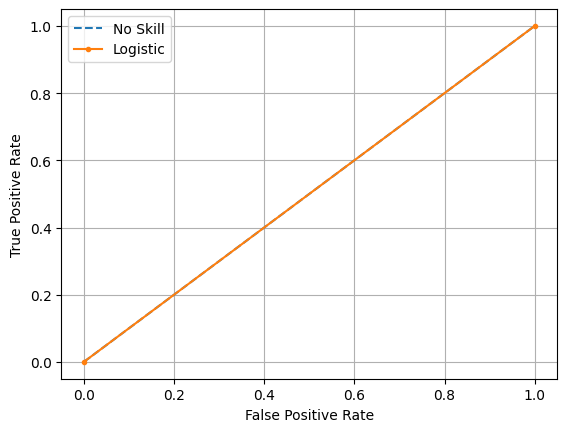

In [17]:
y_pred = dummy_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Dummy')

In [18]:

 
lm = LinearRegression().fit(X_train, y_train) 
lr = LinearRegression()
lr.fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train) 
lm_dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)

y_predict = lm.predict(X_test) 
y_predict_dummy_mean = lm_dummy_mean.predict(X_test) 
y_predict_dummy_median = lm_dummy_median.predict(X_test) 

In [19]:
print('Linear model, coefficients: ', lm.coef_) 
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test,  
                                                                     y_predict_dummy_mean))) 
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict))) 
  
print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(y_test,  
                                                                    y_predict_dummy_median))) 
print("Median absolute error (linear model): {:.2f}".format(median_absolute_error(y_test, y_predict))) 
  
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean))) 
print("r2_score (dummy median): {:.2f}".format(r2_score(y_test, y_predict_dummy_median))) 
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict))) 

Linear model, coefficients:  [ 0.11247324  0.04717687  0.1013805   0.01110012  0.07936182 -0.01992094
 -0.04887744]
Mean squared error (dummy): 0.25
Mean squared error (linear model): 0.18
Median absolute error (dummy): 1.00
Median absolute error (linear model): 0.37
r2_score (dummy mean): -0.00
r2_score (dummy median): -1.02
r2_score (linear model): 0.26


In [20]:
# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, lr.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
# plt.savefig("conf_matrix.png")
plt.show()


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
plt.scatter(X_test, y_test,  color='black') 
plt.plot(X_test, y_predict, color='green', linewidth=2) 
plt.plot(X_test, y_predict_dummy_median, color='blue', linestyle = 'dashed',  
         linewidth=2, label = 'dummy') 
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed',  
         linewidth=2, label = 'dummy') 

[Вернуться в начало](#content)
<a id='task_1_2'></a>
# Задание 1.2

**Провести EDA на своих данных**

Комментарий: В рамках данного пункта необходимо провести предварительный разведочный анализ своего набора данных.

Критерии оценки:

- Рассмотрены базовые характеристики/статистики для набора данных - 2 балла <font color='green'>(status)</font>.
- Реализованы наиболее релевантные визуализации - 4 балла <font color='green'>(status)</font>.
- По ходу работы присутствуют комментарии (вы, как эксперт в предметной области, можете проинтерпретировать полученные результаты анализа, сделав выводы о том, каким образом лучше работать с набором данных в будущем, какие могут возникнуть проблемы, какую предобработку целесообразно сделать и тп) - 4 балла <font color='red'>(status)</font>.
- Продемонстрировать использование библиотеки plotly для визуализации <font color='red'>(status)</font>.

In [22]:
num_cols.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


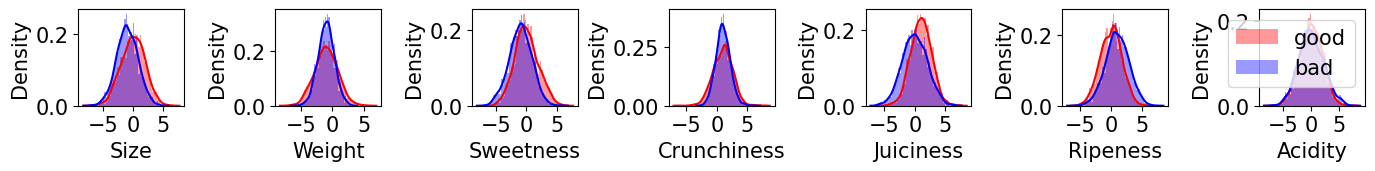

In [23]:
row, col = num_cols.shape
fig, axes = plt.subplots(1, col, figsize=(2 * col, 2))

for idx, feature in enumerate(num_cols.columns):
    for Qua in df['Quality'].unique():
        I = df['Quality'] == Qua
        sns.distplot(df[feature][I], bins=50, color='r' if Qua == 'good' else 'b', ax=axes[idx], label=Qua)
     
plt.legend()
plt.tight_layout()
plt.show()

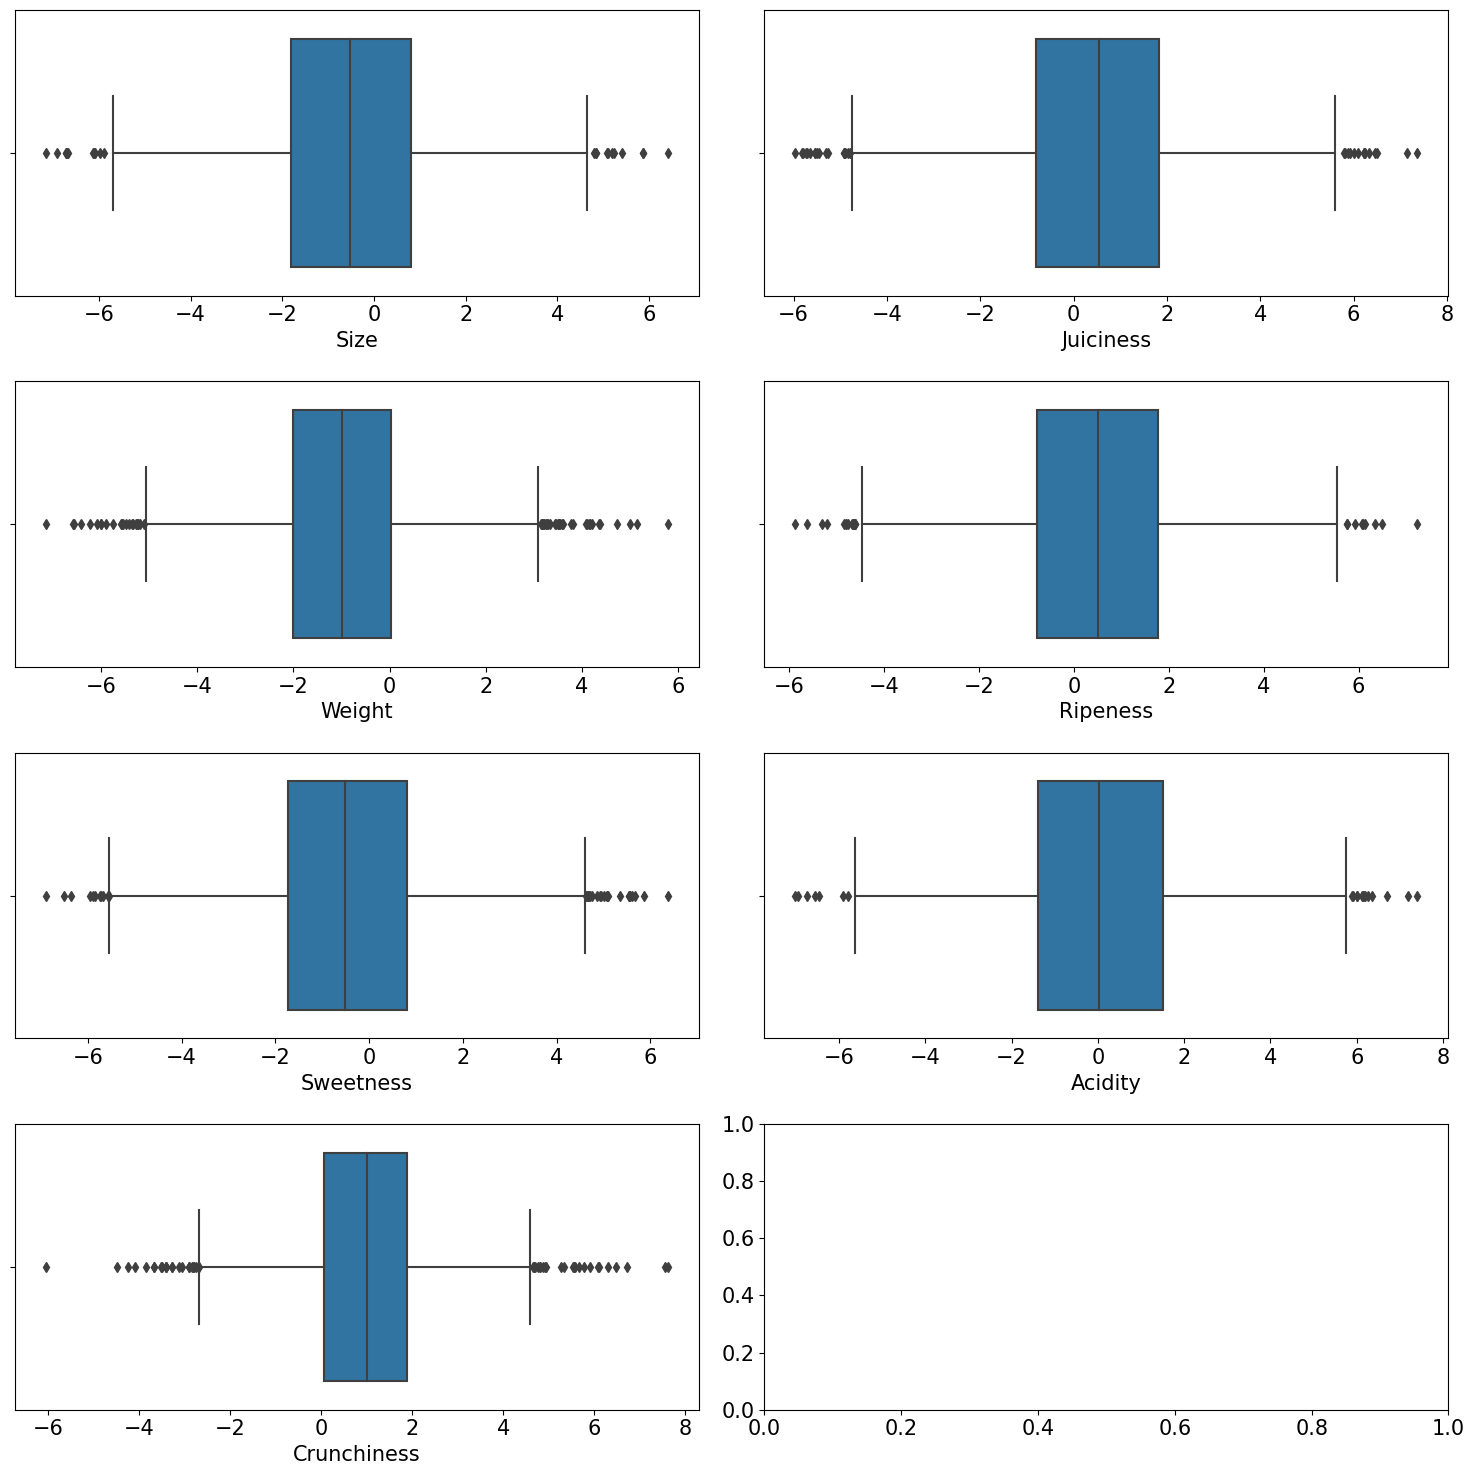

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
count = 0
for idx, feature in enumerate(num_cols.columns):
    sns.boxplot(x=df[feature], ax=axes[count % 4, count // 4])
    count += 1
    
plt.tight_layout()
plt.show()

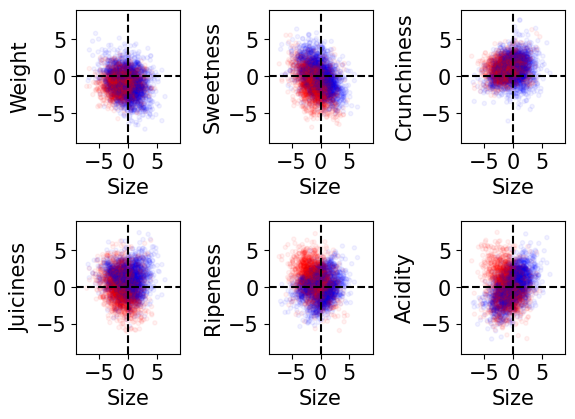

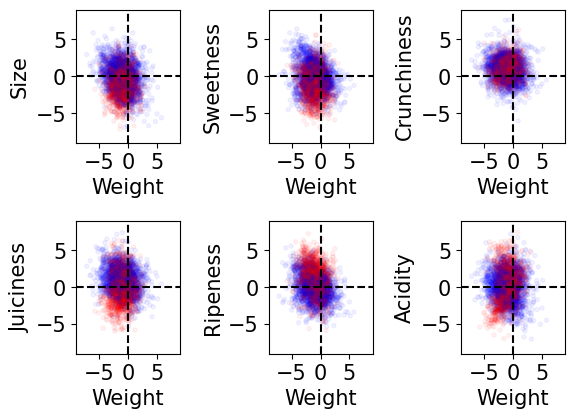

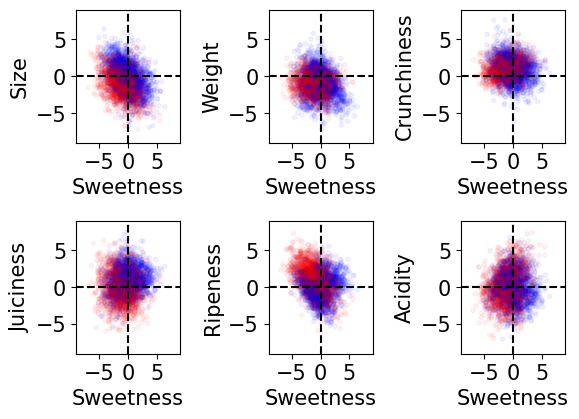

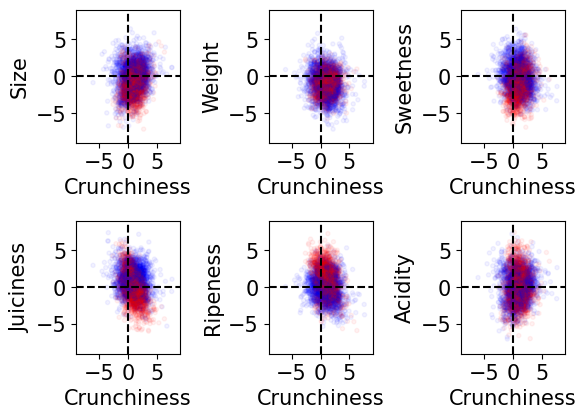

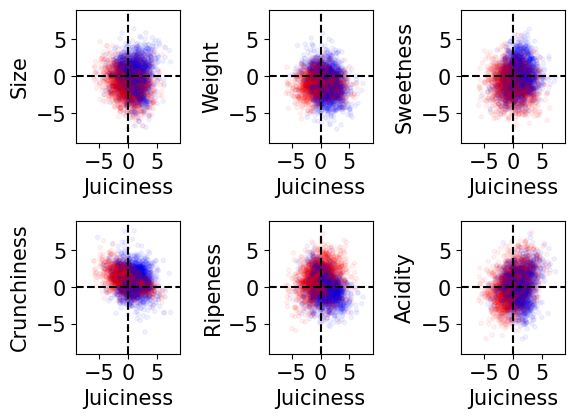

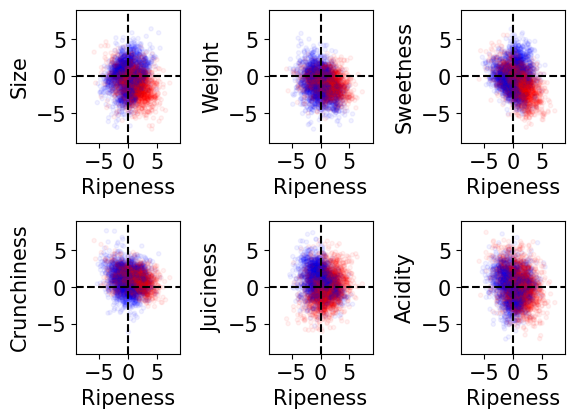

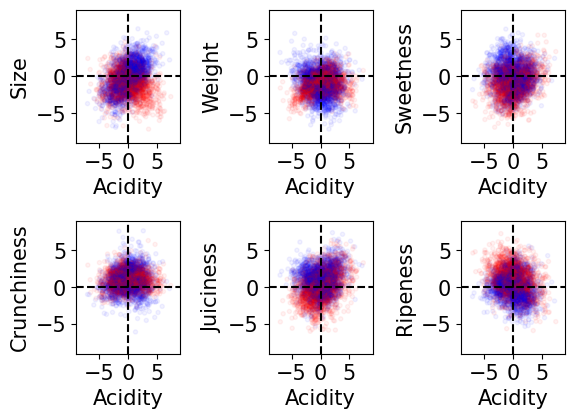

In [24]:
for idxX, featureX in enumerate(num_cols.columns):
    fig = plt.figure(figsize=(6, 6))
    count = 0
    for idx, feature in enumerate(num_cols.columns):
        if featureX == feature: continue
            
        x_data = featureX
        y_data = feature

        def draw_axes():
            plt.xlabel(x_data)
            plt.ylabel(y_data)
            plt.axhline(0.0, color='k', linestyle='--')
            plt.axvline(0.0, color='k', linestyle='--')
            plt.xlim(-9, 9)
            plt.ylim(-9, 9)



        colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

        unique = df['Quality'].unique()
        df_clr = df['Quality'].replace(to_replace=unique, value=colors[:len(unique)])
        ax = fig.add_subplot(331+count)

        ax.scatter(df[x_data], df[y_data], marker='.', c=df_clr, cmap='viridis', alpha=0.05)
        draw_axes()
        
        count += 1
    #     I = df['Quality'] == 'good'
    #     fig.add_subplot(132).scatter(df[x_data][I], df[y_data][I], marker='.', c='b', cmap='viridis', alpha=0.05)
    #     draw_axes()

    #     I = df['Quality'] == 'bad'
    #     fig.add_subplot(133).scatter(df[x_data][I], df[y_data][I], marker='.', c='r', cmap='viridis', alpha=0.05)
    #     draw_axes()


    plt.tight_layout()

    plt.show()



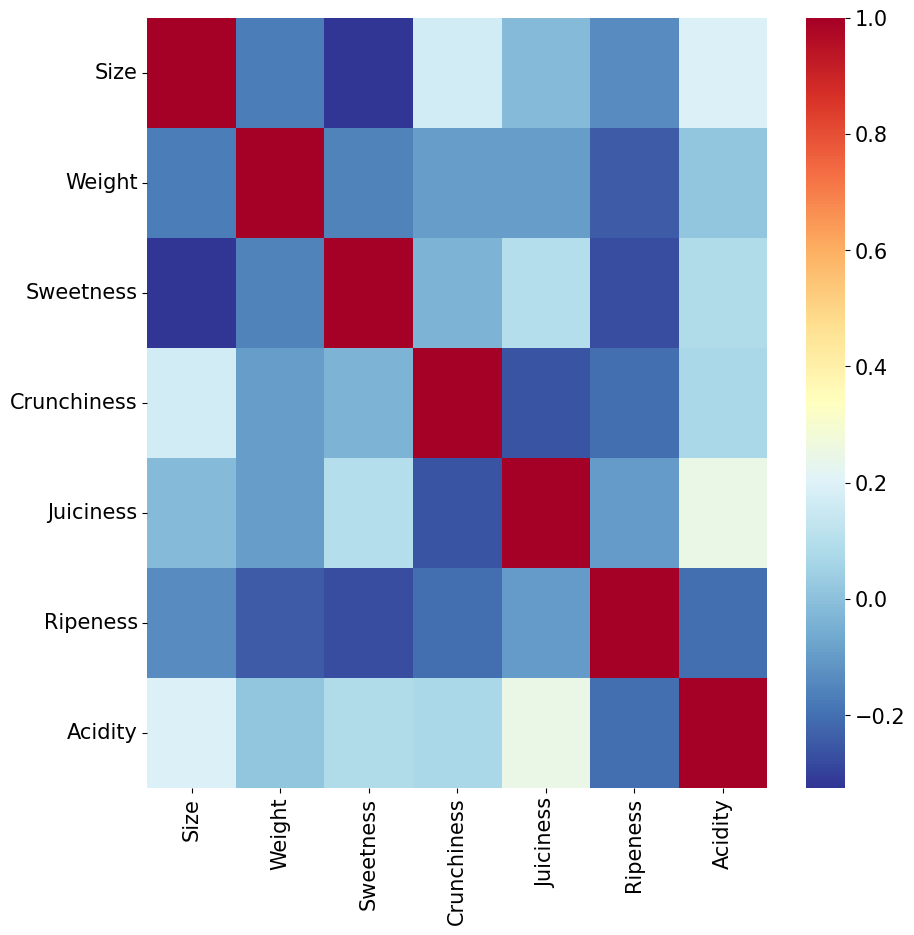

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(num_cols.corr(), cmap="RdYlBu_r");

[Вернуться в начало](#content)
<a id='task_1_3'></a>
# Задание 1.3

**Построить и оценить качество бейзлайна**

Комментарий: В рамках данного пункта необходимо выбрать и обучить бейзлайн-модель, а также измерить ее качество.

Критерии оценки:

- Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - 3 балла.
- Бейзлайновая модель обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 5 балла.
- Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 2 балла.
- Продемонстрировать использование библиотеки plotly для визуализации.

<a id='draft'></a>
[Вернуться в начало](#content)
# Черновики

In [ ]:
# # df2 = df.drop("Bean\nType", axis=1)
# # df2 = df2.drop("Broad Bean\nOrigin", axis=1)

# df2 = df

# fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20), dpi=500)
# for idx, feature in enumerate(df2.columns):
#     df2.plot(feature[I], "Sweetness", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3])
    
# #     I = df['Quality'] == 'good'
# #     fig.add_subplot(132).scatter(df[x_data][I], df[y_data][I], marker='.', c='b', cmap='viridis', alpha=0.05)
# #     draw_axes()

# #     I = df['Quality'] == 'bad'
# #     fig.add_subplot(133).scatter(df[x_data][I], df[y_data][I], marker='.', c='r', cmap='viridis', alpha=0.05)
# #     draw_axes()
    
#     axes[idx // 3, idx % 3].tick_params(axis='x', labelrotation=90)

In [ ]:
# df['Quality'].replace(to_replace=['good', 'bad'], value=[1, 2])
Ind = df.columns
idx = enumerate(df.columns)
print(idx)
print(feature)
df.isna().sum()


В предложенной базе данных приведена таблица с метрическими характеристиками яблок и соответствующие им качественный параметр (хоршое-нехорошее). Стоит отметить, что из 7-ми приведенных метрических параметра, соответствующих каждому яблоку, только 2-а (вес и размер) могут пыть определены без нарушения целостности яблока. Суть обучения машины, по выбранным и удобным параметрам определять качество яблока, чтобы из склада на прилавки магазина поступали преимущественно хорошоие яблоки (от 95%), но не тратить на тестирование много ресурсов и времени. Таким образом вес и размер могут стать хорошим выбором, потому что при взвешивании яблока и измерении его размеров не происходит порча фрукта и оно может быть отправлено на продажу с вероятностью более 95%, что оно хорошего качества.